In [1]:
import sys
sys.path.append('..')

In [2]:
from workspace import nometools as nome

In [3]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import time
import pickle
import scipy
from scipy import stats

In [4]:
main_path = '/home/kevin/DNA-Methylation-patterns/'
data_path = main_path + 'downstream/pstrand/'
steric_path = main_path + 'downstream/steric_clash/'

In [5]:
np.random.seed(1234)

#### Promoter annotation and sorting

In [6]:
## Getting promoters from refGene

# infile = data_path + 'refGene'
# outfile = data_path + 'refGene.promoters.bed'
# nome.get_promoters_refGene(infile, outfile)

In [7]:
outfile = data_path + 'refGene.promoters.bed'
print('no of promoters :', nome.get_num_reads(outfile))

no of promoters : 32386


In [8]:
## sorting bed files promoter

# infile = data_path + 'refGene.promoters.bed'
# outfile = data_path + 'refGene.promoters.sorted.bed'

# nome.sort_bed(infile, outfile)

In [10]:
# ## filtering for chr1 and pos strand

# infile = data_path + 'refGene.promoters.sorted.bed'
# outfile = data_path + 'refGene.promoters.sorted.pos.bed'
# chrs = ['chr1']
# n = 0
# with open(infile, 'r') as fin:
#     n = sum(1 for _ in fin)

# progress_check = int(n/10)
# res = []
# itr = 0
# with open(outfile, 'w') as fout:
#     with open(infile, 'r') as fin:
#         print('start traversing bed file ', infile, 'n = ', n)
#         curr_time = time.time()
#         for line in fin:
#             if itr != 0 and itr%progress_check == 0:
#                 print('progress : {}% and time elapsed {} min'.format(round(itr*100/n,2), round((time.time()-curr_time)/60,2)))
            
#             itr += 1
#             line_s = line.strip().split('\t')
#             chr = line_s[0]
#             # keep if condition for chr filter
#             # if chr in chrs:
#             start = line_s[1]
#             end = line_s[2]
#             refid = line_s[3]
#             geneName = line_s[4]
#             txStart = line_s[5]
#             txEnd = line_s[6]
#             strand = line_s[7]

#             if strand == '+':
#                 fout.write('\t'.join([str(s) for s in [chr, start, end, refid, geneName, txStart, txEnd, strand]]) + '\n')

start traversing bed file  /home/kevin/DNA-Methylation-patterns/downstream/pstrand/refGene.promoters.sorted.bed n =  32386
progress : 10.0% and time elapsed 0.0 min
progress : 20.0% and time elapsed 0.0 min
progress : 29.99% and time elapsed 0.0 min
progress : 39.99% and time elapsed 0.0 min
progress : 49.99% and time elapsed 0.0 min
progress : 59.99% and time elapsed 0.0 min
progress : 69.99% and time elapsed 0.0 min
progress : 79.99% and time elapsed 0.0 min
progress : 89.98% and time elapsed 0.0 min
progress : 99.98% and time elapsed 0.0 min


#### GCH filtering and intersection

In [ ]:
## Filtering GCH file
## Filtering for reads with coverage >= 3

# infile = data_path + 'cpg.raw.sort.GCH.bed'
# outfile = data_path + 'GCH.filtered.bed'

# nome.filter_bed_files(infile, outfile)

In [ ]:
# infile = data_path + 'cpg.raw.sort.GCH.bed'
# outfile = data_path + 'GCH.filtered.bed'
# ni = nome.get_num_reads(infile)
# no = nome.get_num_reads(outfile)
# print('no of reads in GCH file :', ni)
# print('no of reads in filtered GCH file :', no)
# print('percentage of reads remaining {}%'.format(round(no*100/ni, 2)))

In [ ]:
## sorting bed files GCH

# infile = data_path + 'GCH.filtered.bed'
# outfile = data_path + 'GCH.filtered.sorted.bed'

# nome.sort_bed(infile, outfile)

In [13]:
# infile = data_path + 'GCH.filtered.sorted.bed'
# chrs = ['chr' + str(c) for c in range(1, 23)] + ['chrX', 'chrY']
# res = nome.filter_by_chr(infile, chrs=chrs, fstrand='+')

start traversing bed file  /home/kevin/DNA-Methylation-patterns/downstream/pstrand/GCH.filtered.sorted.bed n =  102539428
progress : 10.0% and time elapsed 0.52 min
progress : 20.0% and time elapsed 1.06 min
progress : 30.0% and time elapsed 1.61 min
progress : 40.0% and time elapsed 2.16 min
progress : 50.0% and time elapsed 2.72 min
progress : 60.0% and time elapsed 3.33 min
progress : 70.0% and time elapsed 3.95 min
progress : 80.0% and time elapsed 4.47 min
progress : 90.0% and time elapsed 5.16 min
progress : 100.0% and time elapsed 5.7 min


In [14]:
# len(res), res[0], res[-1]

(51350492,
 ['chr1', 13026, 13027, '+', 0.0, 3],
 ['chrY', 59033075, 59033076, '+', 0.0, 3])

In [15]:
# # writing filter GCH file
# # Filter by pos strand

# outfile = data_path + 'GCH.filtered.sorted.pos.bed'
# with open(outfile, 'w') as fout:
#     for reg in res:
#         fout.write('\t'.join([str(x) for x in reg]) + '\n')

In [121]:
# # GCH intersect with promoter

# promoters_sorted = data_path + 'refGene.promoters.sorted.pos.bed'
# gch_sorted = data_path + 'GCH.filtered.sorted.pos.bed'
# outfile = data_path + 'GCH.promoter.intersect.bed'

# nome.intersect_bed(promoters_sorted, gch_sorted, outfile)

In [17]:
outfile = data_path + 'GCH.promoter.intersect.bed'
print('no of reads in promoter region :', nome.get_num_reads(outfile))

no of reads in promoter region : 749288


In [18]:
outfile = data_path + 'refGene.promoters.sorted.pos.bed'
print('no of promoters :', nome.get_num_reads(outfile))

no of promoters : 16487


In [19]:
infile = data_path + 'GCH.promoter.intersect.bed'
_, df = nome.get_promoter_methylation(infile)

In [20]:
df.head()

,trans_id,refid,gene_name,chrom,promoter_start,promoter_end,TSS,TES,strand,meth_start_genome,meth_end_genome,meth_pos_promo_abs,meth_pos_promo_rel,meth_rate,coverage
0,NM_001385640-857302,NM_001385640,SAMD11,chr1,857302,860302,859302,879954,+,857344,857345,42,-1958,66.67,3
1,NM_001385640-857302,NM_001385640,SAMD11,chr1,857302,860302,859302,879954,+,857351,857352,49,-1951,66.67,3
2,NM_001385640-857302,NM_001385640,SAMD11,chr1,857302,860302,859302,879954,+,857392,857393,90,-1910,0.00,5
3,NM_001385640-857302,NM_001385640,SAMD11,chr1,857302,860302,859302,879954,+,857403,857404,101,-1899,0.00,5
4,NM_001385640-857302,NM_001385640,SAMD11,chr1,857302,860302,859302,879954,+,857416,857417,114,-1886,40.00,5


In [21]:
df.shape

(747046, 15)

In [22]:
print('no of promoters : ', df['trans_id'].unique().shape)

no of promoters :  (16004,)


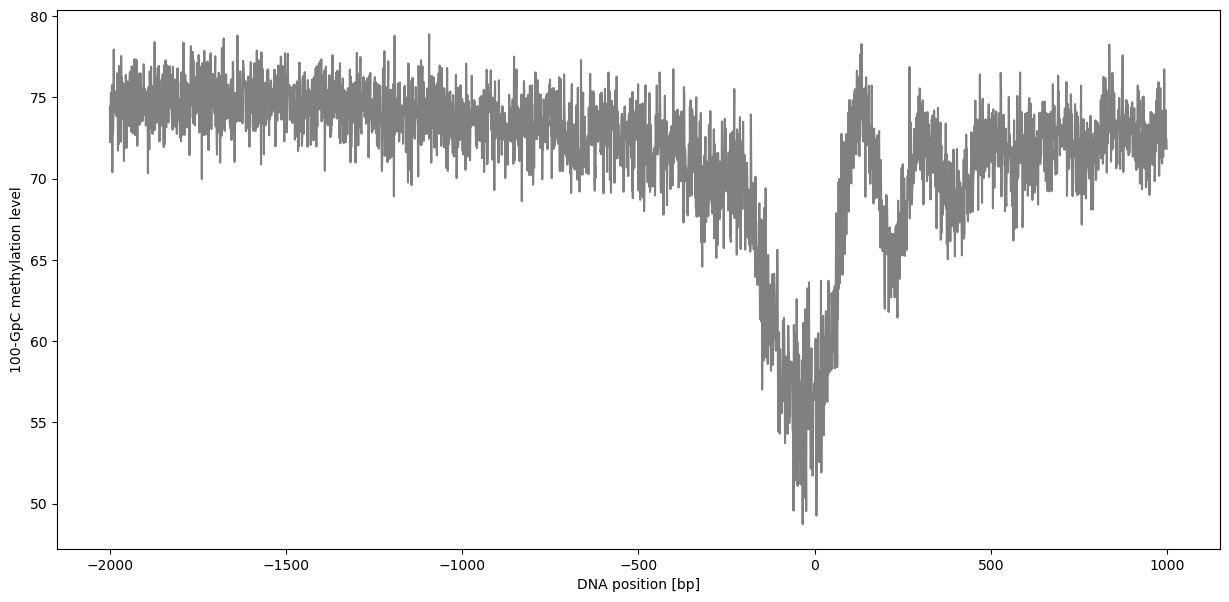

In [23]:
nome.plot_avg_methylation_levels(df, 'GCH')

#### HCG filtering and intersection

In [ ]:
## Filtering HCG file
## Filtering for reads with coverage >= 3

# infile = data_path + 'cpg.raw.sort.HCG.bed'
# outfile = data_path + 'HCG.filtered.bed'

# nome.filter_bed_files(infile, outfile)

In [ ]:
# infile = data_path + 'cpg.raw.sort.HCG.bed'
# outfile = data_path + 'HCG.filtered.bed'
# ni = nome.get_num_reads(infile)
# no = nome.get_num_reads(outfile)
# print('no of reads in HCG file :', ni)
# print('no of reads in filtered HCG file :', no)
# print('percentage of reads remaining {}%'.format(round(no*100/ni, 2)))

In [ ]:
## sorting bed files HCG

# infile = data_path + 'HCG.filtered.bed'
# outfile = data_path + 'HCG.filtered.sorted.bed'

# nome.sort_bed(infile, outfile)

In [24]:
# infile = data_path + 'HCG.filtered.sorted.bed'
# chrs = ['chr' + str(c) for c in range(1, 23)] + ['chrX', 'chrY']
# res = nome.filter_by_chr(infile, chrs=chrs, fstrand='+')

start traversing bed file  /home/kevin/DNA-Methylation-patterns/downstream/pstrand/HCG.filtered.sorted.bed n =  15302833
progress : 10.0% and time elapsed 0.07 min
progress : 20.0% and time elapsed 0.14 min
progress : 30.0% and time elapsed 0.5 min
progress : 40.0% and time elapsed 0.57 min
progress : 50.0% and time elapsed 0.65 min
progress : 60.0% and time elapsed 0.72 min
progress : 70.0% and time elapsed 0.8 min
progress : 80.0% and time elapsed 0.87 min
progress : 90.0% and time elapsed 0.95 min
progress : 100.0% and time elapsed 1.04 min


In [25]:
# len(res), res[0], res[-1]

(7674365,
 ['chr1', 13078, 13079, '+', 33.33, 3],
 ['chrY', 59033030, 59033031, '+', 20.0, 5])

In [26]:
# # writing filter HCG file
# # Filter by pos strand

# outfile = data_path + 'HCG.filtered.sorted.pos.bed'
# with open(outfile, 'w') as fout:
#     for reg in res:
#         fout.write('\t'.join([str(x) for x in reg]) + '\n')

In [27]:
# # HCG intersect with promoter

# promoters_sorted = data_path + 'refGene.promoters.sorted.pos.bed'
# hcg_sorted = data_path + 'HCG.filtered.sorted.pos.bed'
# outfile = data_path + 'HCG.promoter.intersect.bed'

# nome.intersect_bed(promoters_sorted, hcg_sorted, outfile)

In [28]:
infile = data_path + 'HCG.promoter.intersect.bed'
_, df = nome.get_promoter_methylation(infile)

In [29]:
df.head()

,trans_id,refid,gene_name,chrom,promoter_start,promoter_end,TSS,TES,strand,meth_start_genome,meth_end_genome,meth_pos_promo_abs,meth_pos_promo_rel,meth_rate,coverage
0,NM_001385640-857302,NM_001385640,SAMD11,chr1,857302,860302,859302,879954,+,857395,857396,93,-1907,0.0,5
1,NM_152486-859110,NM_152486,SAMD11,chr1,859110,862110,861110,879954,+,861720,861721,2610,610,0.0,4
2,NM_152486-859110,NM_152486,SAMD11,chr1,859110,862110,861110,879954,+,861747,861748,2637,637,0.0,4
3,NM_152486-859110,NM_152486,SAMD11,chr1,859110,862110,861110,879954,+,861761,861762,2651,651,0.0,3
4,NM_152486-859110,NM_152486,SAMD11,chr1,859110,862110,861110,879954,+,861885,861886,2775,775,0.0,3


In [30]:
df.shape

(227219, 15)

In [31]:
print('no of promoters : ', df['trans_id'].unique().shape)

no of promoters :  (15804,)


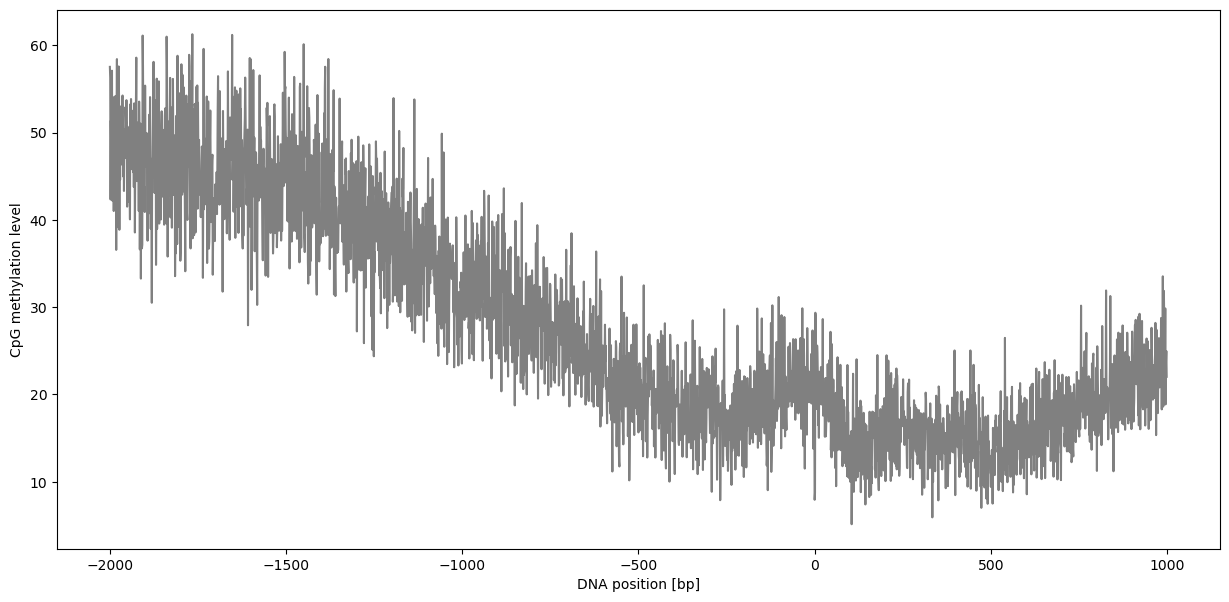

In [32]:
nome.plot_avg_methylation_levels(df, 'HCG')

In [33]:
# df_random = df.copy()
# df_random['meth_rate'] = df_random['meth_rate'].sample(frac=1).reset_index(drop=True)

In [34]:
# outfile = data_path + 'HCG.random.promoter.intersect.bed'
# cols = ['chrom', 'promoter_start', 'promoter_end', 'refid', 'gene_name', 'TSS', 'TES', 'strand', 'chrom', 'meth_start_genome', 'meth_end_genome', 'strand', 'meth_rate', 'coverage']
# df_random[cols].to_csv(outfile, sep='\t', header=False, index=False)

In [35]:
infile = data_path + 'HCG.random.promoter.intersect.bed'
_, df_random = nome.get_promoter_methylation(infile)

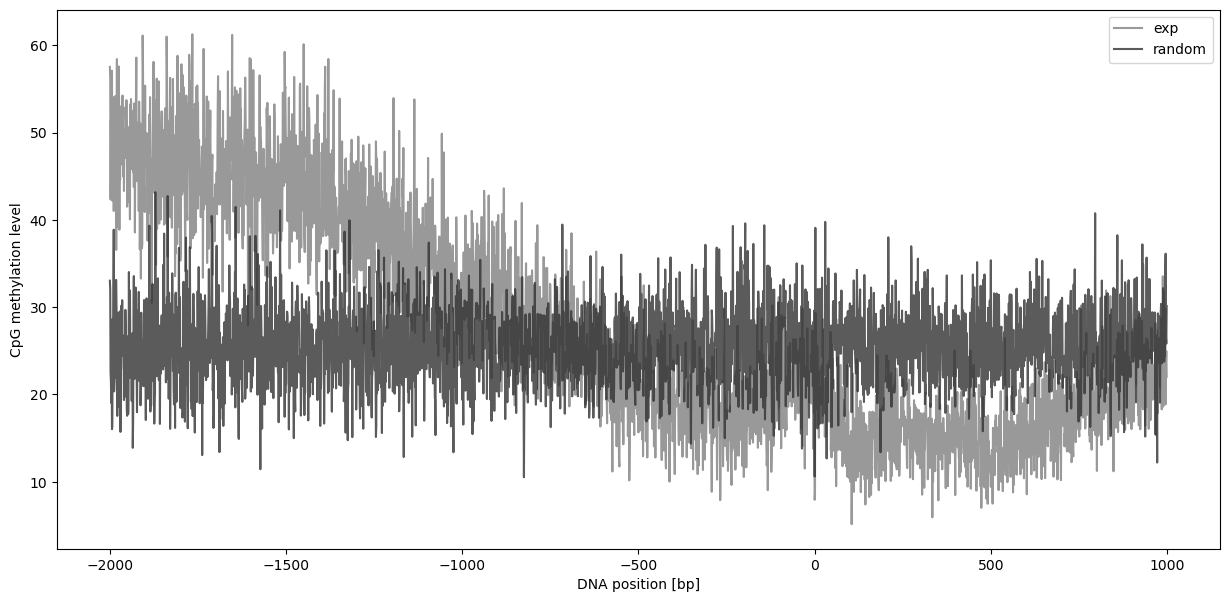

In [36]:
nome.plot_avg_methylation_levels(df, 'HCG', label='exp')
nome.plot_avg_methylation_levels(df_random, 'HCG', fig=False, c='#333232', label='random')

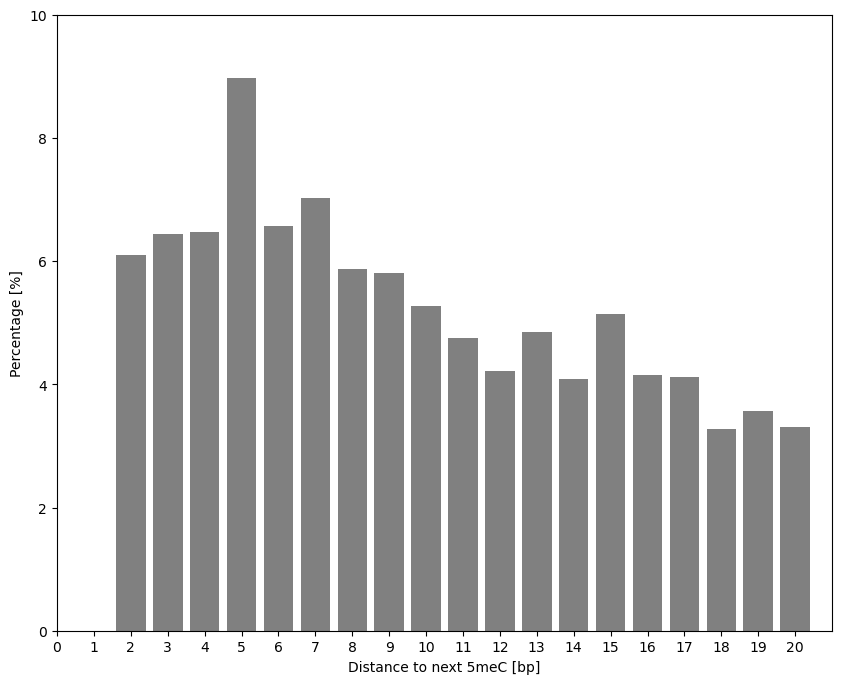

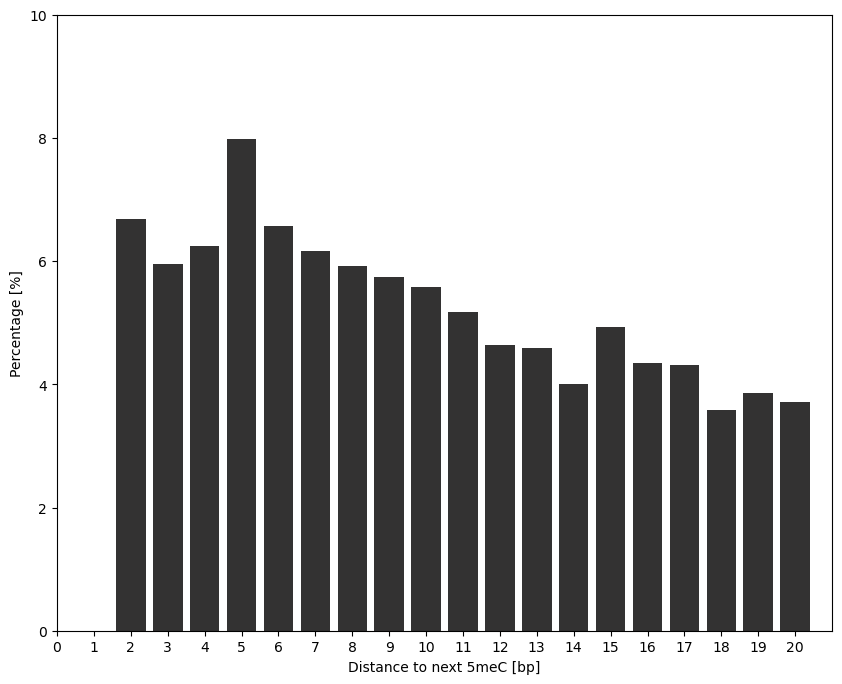

In [37]:
nome.plot_CpG_CpG_dist(df)
nome.plot_CpG_CpG_dist(df_random, c='#333232')

#### NDR (LNDR) regions GCH

In [39]:
# ndr_regions = []
# chrs = ['chr' + str(c) for c in range(1, 23)] + ['chrX', 'chrY']
# for chr in chrs:
#     print(f'Run : {chr}')
#     infile = data_path + 'GCH.filtered.sorted.pos.bed'
#     print('no of reads :', nome.get_num_reads(infile))
#     res = nome.filter_by_chr(infile, chrs=[chr])
#     print(len(res), res[0], res[-1])
#     ndrs = nome.findNDR(res)
#     print(len(ndrs), ndrs[0], ndrs[-1])
#     for reg in ndrs:
#         ndr_regions.append([chr, str(reg[0]), str(reg[1])])

Run : chr1
no of reads : 51350492
start traversing bed file  /home/kevin/DNA-Methylation-patterns/downstream/pstrand/GCH.filtered.sorted.pos.bed n =  51350492
progress : 10.0% and time elapsed 0.24 min
progress : 20.0% and time elapsed 0.33 min
progress : 30.0% and time elapsed 0.42 min
progress : 40.0% and time elapsed 0.51 min
progress : 50.0% and time elapsed 0.61 min
progress : 60.0% and time elapsed 0.7 min
progress : 70.0% and time elapsed 0.79 min
progress : 80.0% and time elapsed 0.88 min
progress : 90.0% and time elapsed 0.97 min
progress : 100.0% and time elapsed 1.07 min
4005637 ['chr1', 13026, 13027, '+', 0.0, 3] ['chr1', 249239673, 249239674, '+', 33.33, 3]
Finding NDR windows
progress : 5.0% and time elapsed 3.36 min
progress : 10.0% and time elapsed 7.22 min
progress : 15.0% and time elapsed 11.04 min
progress : 20.0% and time elapsed 14.72 min
progress : 50.0% and time elapsed 3.72 min
progress : 55.0% and time elapsed 4.12 min
progress : 60.0% and time elapsed 4.43 min

In [40]:
# len(ndr_regions), ndr_regions[0], ndr_regions[-1]

(73462, ['chr1', '238756', '238856'], ['chrY', '28573145', '28573265'])

In [41]:
# outfile = data_path + 'NDR.pos.bed'
# with open(outfile, 'w') as fout:
#     for reg in ndr_regions:
#         fout.write('\t'.join(reg) + '\n')

In [43]:
# print('no of ndrs ', len(ndr_regions))

no of ndrs  73462


In [44]:
# promoters_sorted = data_path + 'refGene.promoters.sorted.pos.bed'
# ndrfile = data_path + 'NDR.pos.bed'
# outfile = data_path + 'NDR.promoter.intersect.bed'
# nome.intersect_bed(promoters_sorted, ndrfile, outfile)

In [45]:
infile = data_path + 'NDR.promoter.intersect.bed'
df = nome.get_nuc_positions(infile)

In [46]:
df.head()

,trans_id,refid,gene_name,chrom,promoter_start,promoter_end,TSS,TES,strand,nuc_region_start_genome,nuc_region_end_genome,nuc_start_promo_abs,nuc_end_promo_abs,nuc_start_promo_rel,nuc_end_promo_rel,region_length
0,NM_198317-893963,NM_198317,KLHL17,chr1,893963,896963,895963,901099,+,896616,896776,2653,2813,653,813,160
1,NM_198576-953499,NM_198576,AGRN,chr1,953499,956499,955499,991494,+,955756,955936,2257,2437,257,437,180
2,NM_152228-1264659,NM_152228,TAS1R3,chr1,1264659,1267659,1266659,1270694,+,1267416,1267536,2757,2877,757,877,120
3,NM_001170688-1548794,NM_001170688,MIB2,chr1,1548794,1551794,1550794,1565990,+,1551096,1551336,2302,2542,302,542,240
4,NM_001170689-1549234,NM_001170689,MIB2,chr1,1549234,1552234,1551234,1565985,+,1551096,1551336,1862,2102,-138,102,240


In [47]:
df_filtered = df.copy()

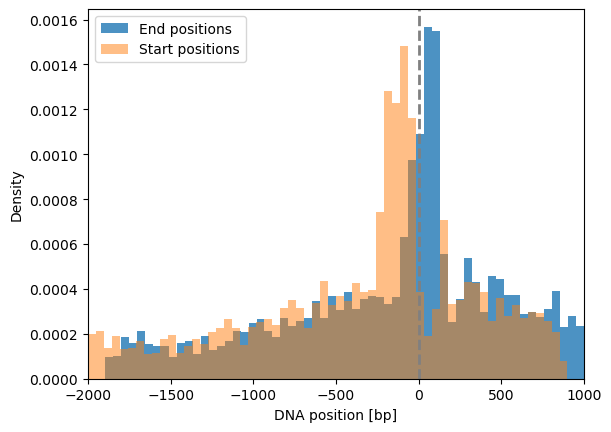

In [48]:
inter_start = -2000
inter_end = 1000
step = 200
inter = range(inter_start,inter_end+1,step)

plt.figure()

plt.hist(df_filtered['nuc_end_promo_rel'],  bins = 60, histtype='bar', density=True, label="End positions", alpha = 0.8)  
plt.hist(df_filtered['nuc_start_promo_rel'], bins = 60, histtype='bar', density=True, label="Start positions", alpha = 0.5)   

plt.xlabel("DNA position [bp]")
plt.ylabel("Density")

plt.xlim(-2000,1000)
plt.axvline(x=0, linestyle='dashed', linewidth=2, color='grey')
plt.legend()
plt.show()

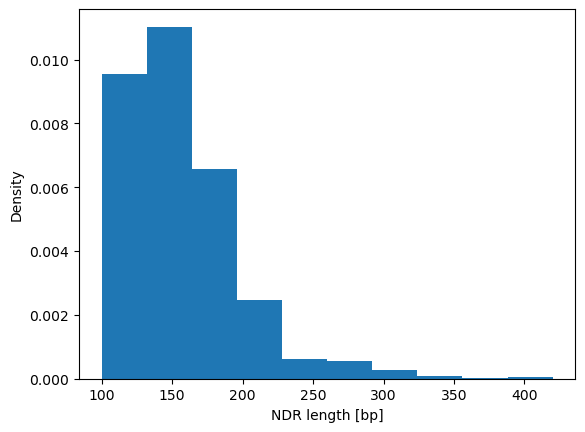

In [49]:
plt.figure()

plt.hist(df_filtered['region_length'], bins=10, histtype='bar', density=True)  

plt.xlabel("NDR length [bp]")
plt.ylabel("Density")
plt.show()

#### NOR (HNDR) Regions GCH

In [50]:
# infile = data_path + 'NDR.pos.bed'
# sizes = data_path + 'hg19.chrom.sizes'
# outfile = data_path + 'NOR.pos.bed'
# nome.complement_bed(infile, sizes, outfile)

In [51]:
# promoters_sorted = data_path + 'refGene.promoters.sorted.pos.bed'
# ndrfile = data_path + 'NOR.pos.bed'
# outfile = data_path + 'NOR.promoter.intersect.bed'
# nome.intersect_bed(promoters_sorted, ndrfile, outfile)

In [52]:
infile = data_path + 'NOR.promoter.intersect.bed'
df = nome.get_nuc_positions(infile)

In [53]:
df.head()

,trans_id,refid,gene_name,chrom,promoter_start,promoter_end,TSS,TES,strand,nuc_region_start_genome,nuc_region_end_genome,nuc_start_promo_abs,nuc_end_promo_abs,nuc_start_promo_rel,nuc_end_promo_rel,region_length
0,NM_198317-893963,NM_198317,KLHL17,chr1,893963,896963,895963,901099,+,894016,896616,53,2653,-1947,653,2600
1,NM_001033581-2002900,NM_001033581,PRKCZ,chr1,2002900,2005900,2004900,2116838,+,2005336,2005776,2436,2876,436,876,440
2,NM_001350805-2003424,NM_001350805,PRKCZ,chr1,2003424,2006424,2005424,2116838,+,2005336,2005776,1912,2352,-88,352,440
3,NM_001303012-2396889,NM_001303012,PLCH2,chr1,2396889,2399889,2398889,2436971,+,2397516,2399556,627,2667,-1373,667,2040
4,NM_001042478-4712668,NM_001042478,AJAP1,chr1,4712668,4715668,4714668,4837855,+,4712936,4713496,268,828,-1732,-1172,560


In [56]:
df_filtered = df[df['region_length'] > 147].copy()
# df_filtered = df.copy()

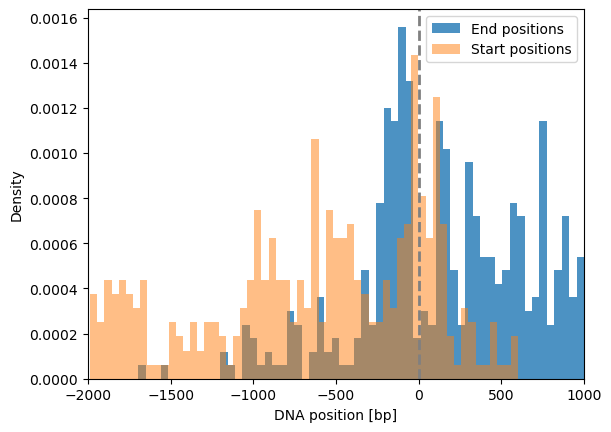

In [58]:
inter_start = -2000
inter_end = 1000
step = 200
inter = range(inter_start,inter_end+1,step)

plt.figure()

plt.hist(df_filtered['nuc_end_promo_rel'],  bins = 60, histtype='bar', density=True, label="End positions", alpha = 0.8)  
plt.hist(df_filtered['nuc_start_promo_rel'], bins = 60, histtype='bar', density=True, label="Start positions", alpha = 0.5)   

plt.xlabel("DNA position [bp]")
plt.ylabel("Density")

plt.xlim(-2000,1000)
plt.axvline(x=0, linestyle='dashed', linewidth=2, color='grey')
plt.legend()
plt.show()

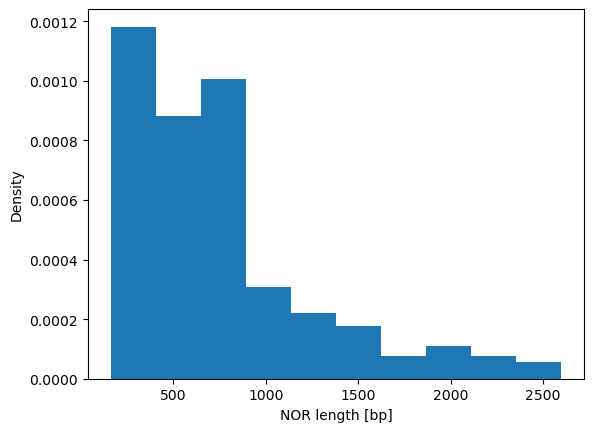

In [59]:
plt.figure()

plt.hist(df_filtered['region_length'], bins=10, histtype='bar', density=True)  

plt.xlabel("NOR length [bp]")
plt.ylabel("Density")
plt.show()

#### Steric Clash and x_clash dict creation

max_clash 65.72379367720465
min_clash 0.0


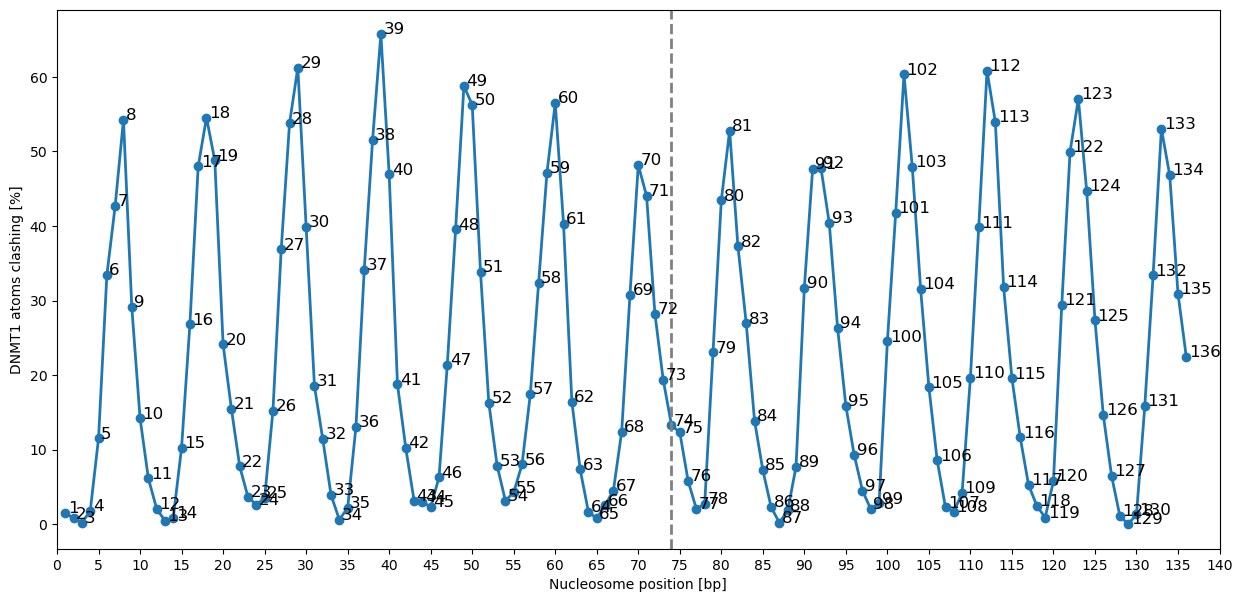

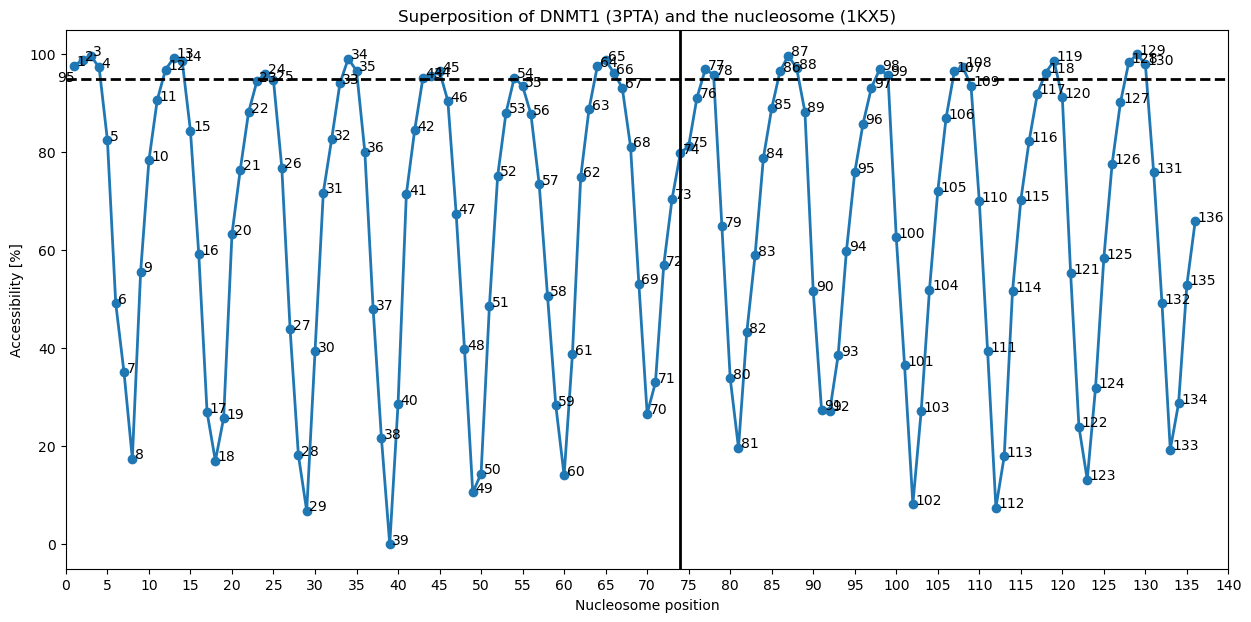

In [60]:
clash_dict_loc = steric_path + 'clash_dict'
info_dict_loc = steric_path + 'info_nbr_dict'
nome.plot_nbr_clashs(steric_path, clash_dict_loc, info_dict_loc)

#### HCG and Random HCG onto NDRs/NORs

In [76]:
# promo_NDR_file = data_path + 'NDR.promoter.intersect.bed'
# promo_HCG_file = data_path + 'HCG.promoter.intersect.bed'
# outfile = data_path + 'promoter.NDR.HCG.intersect.bed'
# nome.intersect_bed(promo_NDR_file, promo_HCG_file, outfile)

In [77]:
# promo_NDR_file = data_path + 'NDR.promoter.intersect.bed'
# promo_HCG_file = data_path + 'HCG.random.promoter.intersect.bed'
# outfile = data_path + 'promoter.NDR.HCG.random.intersect.bed'
# nome.intersect_bed(promo_NDR_file, promo_HCG_file, outfile)

In [78]:
# promo_NDR_file = data_path + 'NOR.promoter.intersect.bed'
# promo_HCG_file = data_path + 'HCG.promoter.intersect.bed'
# outfile = data_path + 'promoter.NOR.HCG.intersect.bed'
# nome.intersect_bed(promo_NDR_file, promo_HCG_file, outfile)

In [79]:
# promo_NDR_file = data_path + 'NOR.promoter.intersect.bed'
# promo_HCG_file = data_path + 'HCG.random.promoter.intersect.bed'
# outfile = data_path + 'promoter.NOR.HCG.random.intersect.bed'
# nome.intersect_bed(promo_NDR_file, promo_HCG_file, outfile)

#### Sliding Window Approach

In [80]:
def normalize_clash_dict(x_y_clash_dict):
    min_clash = min(x_y_clash_dict.values())
    max_clash = max(x_y_clash_dict.values())

    x_y_clash_dict_norm = {k: (float(v-min_clash)/float(max_clash-min_clash))*100 for k, v in x_y_clash_dict.items()}
    return x_y_clash_dict_norm

In [81]:
infile = steric_path + 'x_y_dict'
with open(infile, 'rb') as fin:
    x_y_clash_dict = pickle.load(fin)

x_y_clash_dict_norm = normalize_clash_dict(x_y_clash_dict)

meth_thres_range = [0, 10, 20]
clash_thres_range = [5, 10, 20, 50]

params = []
for clash_thres in clash_thres_range:
    for meth_thres in meth_thres_range:
        k = "c" + str(clash_thres) + "m" + str(meth_thres)
        params.append(k)

In [82]:
def make_sliding_windows_file(df_promo_nuc_WGBS, x_y_clash_dict_norm):
    column_names = ["trans_id", "refid", "NOR_nbr", "window_nbr", "nbr_meth_CpGs", "nuc_region_length", "meth_rates_window"] 
    info_dict = dict()
    for col in column_names:
        info_dict[col] = []
        
    all_nuc_pos = x_y_clash_dict_norm.keys()
    nbr_bases_nuc = len(all_nuc_pos)
    
    all_trans_ids = list(set(list(df_promo_nuc_WGBS["trans_id"])))
    
    c = 0
    for trans_id in all_trans_ids:
        refid = trans_id.split("-")[0]
        c += 1
        
        df_WGBS_tmp = df_promo_nuc_WGBS.loc[df_promo_nuc_WGBS["trans_id"] == trans_id]
        
        NOR_number = 1
        nuc_region_starts = list(set(list(df_WGBS_tmp["nuc_region_start_genome"])))
        for NOR_start in nuc_region_starts:
            df_NOR_tmp = df_WGBS_tmp.loc[df_WGBS_tmp["nuc_region_start_genome"] == NOR_start]
            
            start = NOR_start
            win_nbr = 1
                    
            list_meth_positions = list(df_NOR_tmp["meth_start_genome"])
            list_meth_rates = list(df_NOR_tmp["meth_rate"])
            meth_dict_promoter = dict(zip(list_meth_positions, list_meth_rates))
    
            NOR_end = list(df_NOR_tmp["nuc_region_end_genome"])[0]
            
            while start + nbr_bases_nuc - 1 <= NOR_end:
                #get relative and absolute position+methylation
                window_start = start
                window_end = window_start+nbr_bases_nuc-1
                
                meth_in_window_tmp = dict()
                for meth_start_genome in meth_dict_promoter.keys():
                    if (window_start <= meth_start_genome) & (meth_start_genome <= window_end):
                        rel_pos = meth_start_genome-window_start+1
                        
                        meth_rate = meth_dict_promoter[meth_start_genome]
                        meth_in_window_tmp[rel_pos] = meth_rate
                
                if len(meth_in_window_tmp) != 0:
                    #exp
                    info_dict["trans_id"].append(trans_id)
                    info_dict["refid"].append(refid)
                    info_dict["NOR_nbr"].append(NOR_number)
                    info_dict["window_nbr"].append(win_nbr)
                    info_dict["nbr_meth_CpGs"].append(len(meth_in_window_tmp.keys()))
                    info_dict["nuc_region_length"].append(np.abs(NOR_end-NOR_start)+1)
                    info_dict["meth_rates_window"].append(meth_in_window_tmp)
                
                start += 1
                win_nbr += 1
        
            NOR_number += 1
                
                
    #Built dataframe
    df = pd.DataFrame(0, index = np.arange(len(info_dict["trans_id"])),columns = column_names)
    for feat in column_names:
        df[feat] = info_dict[feat]

    return df

In [83]:
def calc_perc_exp_clash_ident(x_y_clash_dict_norm, meth_in_window_tmp, meth_thres, clash_thres):    
    count_ident = 0
    cpg_positions = meth_in_window_tmp.keys()
    for meth_pos in cpg_positions:
        meth_rate = meth_in_window_tmp[meth_pos]
        clash_perc = x_y_clash_dict[meth_pos] 
        
        if meth_rate > meth_thres:
            if clash_perc <= clash_thres:
                count_ident += 1
        else:
            if clash_perc > clash_thres:
                count_ident += 1
                
    nbr_cpgs = len(cpg_positions)
    perc_exp_clash_ident = float(count_ident)/float(nbr_cpgs)
    
    return perc_exp_clash_ident

In [84]:
import re

def calc_score_lists(df_sliding_windows, x_y_clash_dict_norm, params):
    column_names = ["refid_NOR", "trans_id", "refid", "NOR_nbr", "window_nbr", "nbr_CpGs", "nuc_region_length"] + params
    info_dict = dict()
    for col in column_names:
        info_dict[col] = []
        
    all_refids = list(df_sliding_windows["refid"])
    all_NOR_nbrs = list(df_sliding_windows["NOR_nbr"])
    refid_NORs = []
    for ref, nor in zip(all_refids, all_NOR_nbrs):
        refid_NORs.append(str(ref)+"-"+str(nor))
    
    info_dict["refid_NOR"].extend(refid_NORs)
    info_dict["trans_id"].extend(list(df_sliding_windows["trans_id"]))
    info_dict["refid"].extend(all_refids)
    info_dict["NOR_nbr"].extend(all_NOR_nbrs)
    info_dict["window_nbr"].extend( list(df_sliding_windows["window_nbr"]))
    info_dict["nbr_CpGs"].extend(list(df_sliding_windows["nbr_meth_CpGs"])  )
    info_dict["nuc_region_length"].extend(list(df_sliding_windows["nuc_region_length"]))

    all_scores =  list(df_sliding_windows["meth_rates_window"]) #{34: 0.0, 35: 0.0,...}
    c = 0
    for row_df in range(len(all_scores)):
        c += 1
        
        # meth_rates_window = ast.literal_eval(all_scores[row_df])
        meth_rates_window = all_scores[row_df]
    
        for param_str in params:
            clash_thres = float(re.findall(r'\d+', param_str)[0]) #c5m0
            meth_thres = float(re.findall(r'\d+', param_str)[1])
            
            perc_clash_ident = calc_perc_exp_clash_ident(x_y_clash_dict_norm, meth_rates_window, meth_thres, clash_thres)
            info_dict[param_str].append(perc_clash_ident)
            
    #Built dataframe 
    df_scores = pd.DataFrame(0, index = np.arange(len(info_dict[column_names[0]])),columns = column_names)
    for feat in column_names:
        df_scores[feat] = info_dict[feat]

    return df_scores

In [85]:
def calculate_cohens_d(list_EXP,list_RAND):
    mEXP = np.mean(list_EXP)
    sdEXP = np.std(list_EXP)
    
    mRAND = np.mean(list_RAND)
    sdRAND = np.std(list_RAND)
    
    denom = np.sqrt(float(sdEXP**2 + sdRAND**2)/2.0)
    cohens_d = float(mEXP-mRAND)/float(denom)
    
    return cohens_d

def make_df_p_vals_cohens_d(df_scores_EXP, df_scores_RAND, params):
    column_names = ["nbr_CpGs", "parameter", "N_EXP", "N_RAND", "mean_EXP", "median_EXP", "std_EXP", "mean_RAND",
                    "median_RAND", "std_RAND", "cohens_d", "is_normal_EXP", "is_normal_RAND", "pval_ttest",
                    "t_stat", "pval_ranksums", "pval_ks_2samp"]
    info_dict = dict()
    for col in column_names:
        info_dict[col] = []

    nbr_CpGs_list = list(set(list(df_scores_EXP["nbr_CpGs"])))

    for nbr_CpGs in nbr_CpGs_list:
        df_scores_EXP_tmp = df_scores_EXP.loc[df_scores_EXP["nbr_CpGs"] == nbr_CpGs]
        df_scores_RAND_tmp = df_scores_RAND.loc[df_scores_RAND["nbr_CpGs"] == nbr_CpGs]
                    
        for p in range(len(params)):
            par_name = params[p]
            EXP_scores = list(df_scores_EXP_tmp[par_name])
            RAND_scores = list(df_scores_RAND_tmp[par_name])
            
            info_dict["nbr_CpGs"].append(nbr_CpGs)
            info_dict["parameter"].append(par_name)
            
            info_dict["N_EXP"].append(len(EXP_scores))
            info_dict["N_RAND"].append(len(RAND_scores))
            
            info_dict["mean_EXP"].append(np.mean(EXP_scores))
            info_dict["median_EXP"].append(np.median(EXP_scores))
            info_dict["std_EXP"].append(np.std(EXP_scores))
            
            info_dict["mean_RAND"].append(np.mean(RAND_scores))
            info_dict["median_RAND"].append(np.median(RAND_scores))
            info_dict["std_RAND"].append(np.std(RAND_scores))
            
            #EFFECT SIZE
            cohens_d = calculate_cohens_d(EXP_scores, RAND_scores)
            info_dict["cohens_d"].append(cohens_d)
            
            #STAT TESTS
            #is normal distributed? This function tests the null hypothesis that a sample comes from a normal distribution. If small -> ost likely not normal dustributed
            pval_normal_EXP = stats.normaltest(EXP_scores)[1] if len(EXP_scores) >= 8 else -1
            pval_normal_RAND = stats.normaltest(RAND_scores)[1] if len(EXP_scores) >= 8 else -1
            
            #students t
            ttest_res = stats.ttest_ind(EXP_scores,RAND_scores,equal_var = False)
            t_stat = ttest_res[0]
            p_val_ttest = float(ttest_res[1])/2.0
            
            #ranksums, kstest
            ranksums = scipy.stats.ranksums(EXP_scores,RAND_scores)[1]
            ks_2samp = scipy.stats.ks_2samp(EXP_scores,RAND_scores)[1]
    
            info_dict["is_normal_EXP"].append(pval_normal_EXP)
            info_dict["is_normal_RAND"].append(pval_normal_RAND)
            info_dict["pval_ttest"].append(p_val_ttest)
            info_dict["t_stat"].append(t_stat)
            info_dict["pval_ranksums"].append(ranksums)
            info_dict["pval_ks_2samp"].append(ks_2samp)
            
    #Built dataframe
    df = pd.DataFrame(0, index = np.arange(len(info_dict["nbr_CpGs"])),columns = column_names)
    for feat in column_names:
        df[feat] = info_dict[feat]

    return df

In [86]:
def plot_nbr_CpGs_cohensd(df_values, params):
    plt.figure(figsize=(15,7))
    ax = plt.subplot(1,1,1)
    
    nbr_CpGs_list = sorted(list(set(list(df_values["nbr_CpGs"]))))

    for par_name in params:
        
        df_values_tmp = df_values.loc[df_values["parameter"] == par_name]
        
        x_nbr_cpg_vals = list(df_values_tmp["nbr_CpGs"])
        y_cohens_d_vals = list(df_values_tmp["cohens_d"])
        
        if "m0" in par_name:
            c = "#117A65"
        if "m10" in par_name:
            c = "#45B39D"
        if "m20" in par_name:
            c = "#EB984E"
        if "c5" in par_name:
            m = "*"
            ms = 15
        if "c10" in par_name:
            m = "^"
            ms = 10
        if "c20" in par_name:
            m = "s"
            ms = 10
        if "c50" in par_name:
            m = "o"
            ms = 10
        
        
        plt.plot(x_nbr_cpg_vals, y_cohens_d_vals, linestyle="-", color=c, marker=m, markersize=ms, label=par_name)
    
    
    plt.axhline(y=0.2, linewidth=1, color = '#2C3E50',linestyle='--')
    plt.axhline(y=0.5, linewidth=1, color = '#2C3E50',linestyle='--')
    plt.axhline(y=0.8, linewidth=1, color = '#2C3E50',linestyle='--')
    
    e = 0.02
    ax.text(-1.8,0.2+e,"Small ES")
    ax.text(-1.8,0.5+e,"Medium ES")
    ax.text(-1.8,0.8+e,"Large ES")

    ax.set_ylabel("Cohen's d")
    ax.set_xlabel("Number of CpGs in sliding window")   

    plt.xlim(-2,35)
    plt.ylim(-3,3)

    legend = ax.legend(loc="lower left",ncol=4,frameon = 1,prop={'size':14})
    legend.get_frame().set_facecolor('white')

In [87]:
def plot_pvals_cohensd(df_values,params):
    
    plt.figure(figsize=(20,7))
    ax = plt.subplot(1,1,1)
    
    nbr_CpGs_list = sorted(list(set(list(df_values["nbr_CpGs"]))))
    
    for par_name in params:
        df_values_tmp = df_values.loc[df_values["parameter"] == par_name]
        
        x_nbr_cpg_vals = list(df_values_tmp["nbr_CpGs"])
        y_pvals_vals = list(df_values_tmp["pval_ranksums"])
        
        y_pvals_log = [-np.log10(p_val) if p_val != 0.0 else 310 for p_val in y_pvals_vals]
        
        if "m0" in par_name:
            c = "#117A65"
        if "m10" in par_name:
            c = "#45B39D"
        if "m20" in par_name:
            c = "#EB984E"
        if "c5" in par_name:
            m = "*"
            ms = 15
        if "c10" in par_name:
            m = "^"
            ms = 10
        if "c20" in par_name:
            m = "s"
            ms = 10
        if "c50" in par_name:
            m = "o"
            ms = 10
        
        
        plt.plot(x_nbr_cpg_vals,y_pvals_log,linestyle="-",color=c,marker=m,markersize=ms,label=par_name)
    
    
    #plt.axhline(y=-np.log10(0.05), linewidth=1, color = '#5D6D7E',linestyle='-')
    #plt.axhline(y=-np.log10(0.01), linewidth=1, color = '#515A5A',linestyle='-')

    ax.set_ylabel("-log10(p-value)")
    ax.set_xlabel("Number of CpGs in sliding window")   

    # plt.xlim(-2,35)
    # plt.ylim(0,450)

    legend = ax.legend(loc="upper right",ncol=4,frameon = 1,prop={'size':14})
    legend.get_frame().set_facecolor('white')

In [88]:
def plot_score_distribution(df_scores_EXP,df_scores_RAND,params):

    fig = plt.figure(figsize=(15,15))
    for idx, p in enumerate(range(len(params))):
        par_name = params[p]
        EXP_scores = list(df_scores_EXP[par_name])
        RAND_scores = list(df_scores_RAND[par_name])
                
        ttest_res = stats.ttest_ind(EXP_scores,RAND_scores,equal_var = False)
        t = ttest_res[0]
        p_val = float(ttest_res[1])/2.0
        
        
        ranksums = scipy.stats.ranksums(EXP_scores,RAND_scores)[1]
        ks_2samp = scipy.stats.ks_2samp(EXP_scores,RAND_scores)[1]

        #EFFECT SIZE
        cohens_d = calculate_cohens_d(EXP_scores,RAND_scores)
        
        #test for normal ditribution
        pval_normal_EXP = stats.normaltest(EXP_scores)[1] if len(EXP_scores) >= 8 else -1   #This function tests the null hypothesis that a sample comes from a normal distribution. If small -> ost likely not normal dustributed
        pval_normal_RAND = stats.normaltest(RAND_scores)[1] if len(EXP_scores) >= 8 else -1
                
        #PLOTTING
        bins = 20    
        
        ax = plt.subplot(4, 3, idx + 1)
        
        c1 = "#5499C7"
        c2 = "#7DCEA0"
        
        ax.annotate(par_name, xy=(0, 1), xycoords='axes fraction', fontsize=10, xytext=(5, -5), textcoords='offset points',ha='left', va='top') #region_name+" - "+

        plt.hist(np.array(EXP_scores), bins=bins, color=c1, label="Experimental", alpha=0.8)
        plt.hist(np.array(RAND_scores), bins=bins, color=c2, label="Random", alpha=0.8)
        
        # legend = ax.legend(loc="upper right",frameon = 1,prop={'size':16})
        # legend.get_frame().set_facecolor('white')
        
        plt.xlim(0,1)
        
        ax.set_xlabel("Matching score")
        ax.set_ylabel("Density")

In [89]:
def plot_hist_distr_CpGs(df_scores):  
    
    nbr_CpG_list = list(df_scores["nbr_CpGs"])
    x = sorted(list(set(nbr_CpG_list)))  
    y = [nbr_CpG_list.count(c) for c in x]  
    
    tot = len(nbr_CpG_list)
    p = 0
    for nbr_cpg,freq in zip(x,y):
        perc = (float(freq)/float(tot))*100
        p += perc
    
    for nbr_cpg_pos in range(len(x)):
        nbr_cpg = x[nbr_cpg_pos]
        freq = sum(y[nbr_cpg_pos:])
        perc = (float(freq)/float(tot))*100
    
    #PLOTTING
    bins = len(set(nbr_CpG_list))   
    
    fig = plt.figure()
    ax = plt.subplot(111)
    
    c1 = "#515A5A"
    c2 = "#7DCEA0"
    
    plt.hist(np.array(nbr_CpG_list), bins=bins, color=c1)
    # sns.distplot(np.array(nbr_CpG_list),norm_hist=True,kde=False,bins=bins,color=c1)   # norm_hist : bool, otional If True, the histogram height shows a density rather than a count. This is implied if a KDE or fitted density is plotted.
        
    ax.set_xlabel("Number of CpGs")
    ax.set_ylabel("Density")
    
    xticks = range(0,len(set(nbr_CpG_list)),5)
    plt.xlim(0,len(set(nbr_CpG_list))+1)
    plt.xticks([i+0.2 for i in xticks],xticks)


##### Sliding Window for NDRs

In [90]:
infile = data_path + 'promoter.NDR.HCG.intersect.bed'
df = nome.get_nuc_pos_methylation(infile)

infile = data_path + 'promoter.NDR.HCG.random.intersect.bed'
df_random = nome.get_nuc_pos_methylation(infile)

In [91]:
df.head()

,trans_id,refid,gene_name,chrom,promoter_start,promoter_end,TSS,TES,strand,nuc_region_start_genome,nuc_region_end_genome,nuc_region_length,meth_start_genome,meth_end_genome,meth_rate
0,NM_198317-893963,NM_198317,KLHL17,chr1,893963,896963,895963,901099,+,896616,896776,160,894256,894257,0.0
1,NM_198317-893963,NM_198317,KLHL17,chr1,893963,896963,895963,901099,+,896616,896776,160,894291,894292,0.0
2,NM_198317-893963,NM_198317,KLHL17,chr1,893963,896963,895963,901099,+,896616,896776,160,894471,894472,0.0
3,NM_198317-893963,NM_198317,KLHL17,chr1,893963,896963,895963,901099,+,896616,896776,160,894490,894491,0.0
4,NM_198317-893963,NM_198317,KLHL17,chr1,893963,896963,895963,901099,+,896616,896776,160,894494,894495,0.0


In [92]:
df_random.head()

,trans_id,refid,gene_name,chrom,promoter_start,promoter_end,TSS,TES,strand,nuc_region_start_genome,nuc_region_end_genome,nuc_region_length,meth_start_genome,meth_end_genome,meth_rate
0,NM_198317-893963,NM_198317,KLHL17,chr1,893963,896963,895963,901099,+,896616,896776,160,894256,894257,0.00
1,NM_198317-893963,NM_198317,KLHL17,chr1,893963,896963,895963,901099,+,896616,896776,160,894291,894292,33.33
2,NM_198317-893963,NM_198317,KLHL17,chr1,893963,896963,895963,901099,+,896616,896776,160,894471,894472,0.00
3,NM_198317-893963,NM_198317,KLHL17,chr1,893963,896963,895963,901099,+,896616,896776,160,894490,894491,100.00
4,NM_198317-893963,NM_198317,KLHL17,chr1,893963,896963,895963,901099,+,896616,896776,160,894494,894495,33.33


In [93]:
df_sliding_windows = make_sliding_windows_file(df, x_y_clash_dict_norm)
df_sliding_windows_random = make_sliding_windows_file(df_random, x_y_clash_dict_norm)

In [94]:
df_sliding_windows.head()

,trans_id,refid,NOR_nbr,window_nbr,nbr_meth_CpGs,nuc_region_length,meth_rates_window
0,NM_001033521-54965426,NM_001033521,1,1,4,401,"{21: 0.0, 79: 0.0, 94: 0.0, 131: 66.67}"
1,NM_001033521-54965426,NM_001033521,1,2,4,401,"{20: 0.0, 78: 0.0, 93: 0.0, 130: 66.67}"
2,NM_001033521-54965426,NM_001033521,1,3,4,401,"{19: 0.0, 77: 0.0, 92: 0.0, 129: 66.67}"
3,NM_001033521-54965426,NM_001033521,1,4,4,401,"{18: 0.0, 76: 0.0, 91: 0.0, 128: 66.67}"
4,NM_001033521-54965426,NM_001033521,1,5,4,401,"{17: 0.0, 75: 0.0, 90: 0.0, 127: 66.67}"


In [95]:
df_sliding_windows_random.head()

,trans_id,refid,NOR_nbr,window_nbr,nbr_meth_CpGs,nuc_region_length,meth_rates_window
0,NM_001033521-54965426,NM_001033521,1,1,4,401,"{21: 0.0, 79: 0.0, 94: 0.0, 131: 0.0}"
1,NM_001033521-54965426,NM_001033521,1,2,4,401,"{20: 0.0, 78: 0.0, 93: 0.0, 130: 0.0}"
2,NM_001033521-54965426,NM_001033521,1,3,4,401,"{19: 0.0, 77: 0.0, 92: 0.0, 129: 0.0}"
3,NM_001033521-54965426,NM_001033521,1,4,4,401,"{18: 0.0, 76: 0.0, 91: 0.0, 128: 0.0}"
4,NM_001033521-54965426,NM_001033521,1,5,4,401,"{17: 0.0, 75: 0.0, 90: 0.0, 127: 0.0}"


In [96]:
df_score_exp = calc_score_lists(df_sliding_windows, x_y_clash_dict_norm, params)
df_score_random = calc_score_lists(df_sliding_windows_random, x_y_clash_dict_norm, params)

In [97]:
df_score_exp.head()

,refid_NOR,trans_id,refid,NOR_nbr,window_nbr,nbr_CpGs,nuc_region_length,c5m0,c5m10,c5m20,c10m0,c10m10,c10m20,c20m0,c20m10,c20m20,c50m0,c50m10,c50m20
0,NM_001033521-1,NM_001033521-54965426,NM_001033521,1,1,4,401,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.25,0.25,0.25
1,NM_001033521-1,NM_001033521-54965426,NM_001033521,1,2,4,401,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.25,0.25,0.25
2,NM_001033521-1,NM_001033521-54965426,NM_001033521,1,3,4,401,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.25,0.25,0.25
3,NM_001033521-1,NM_001033521-54965426,NM_001033521,1,4,4,401,1.00,1.00,1.00,0.75,0.75,0.75,0.75,0.75,0.75,0.50,0.50,0.50
4,NM_001033521-1,NM_001033521-54965426,NM_001033521,1,5,4,401,0.75,0.75,0.75,1.00,1.00,1.00,0.75,0.75,0.75,0.25,0.25,0.25


In [98]:
df_score_random.head()

,refid_NOR,trans_id,refid,NOR_nbr,window_nbr,nbr_CpGs,nuc_region_length,c5m0,c5m10,c5m20,c10m0,c10m10,c10m20,c20m0,c20m10,c20m20,c50m0,c50m10,c50m20
0,NM_001033521-1,NM_001033521-54965426,NM_001033521,1,1,4,401,1.00,1.00,1.00,1.00,1.00,1.00,0.5,0.5,0.5,0.00,0.00,0.00
1,NM_001033521-1,NM_001033521-54965426,NM_001033521,1,2,4,401,0.50,0.50,0.50,0.50,0.50,0.50,0.5,0.5,0.5,0.00,0.00,0.00
2,NM_001033521-1,NM_001033521-54965426,NM_001033521,1,3,4,401,0.50,0.50,0.50,0.50,0.50,0.50,0.5,0.5,0.5,0.00,0.00,0.00
3,NM_001033521-1,NM_001033521-54965426,NM_001033521,1,4,4,401,0.75,0.75,0.75,0.50,0.50,0.50,0.5,0.5,0.5,0.25,0.25,0.25
4,NM_001033521-1,NM_001033521-54965426,NM_001033521,1,5,4,401,1.00,1.00,1.00,0.75,0.75,0.75,0.5,0.5,0.5,0.00,0.00,0.00


In [99]:
df_pvalues = make_df_p_vals_cohens_d(df_score_exp, df_score_random, params)

/home/kevin/miniconda3/envs/helms-lab/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [100]:
df_pvalues.head()

,nbr_CpGs,parameter,N_EXP,N_RAND,mean_EXP,median_EXP,std_EXP,mean_RAND,median_RAND,std_RAND,cohens_d,is_normal_EXP,is_normal_RAND,pval_ttest,t_stat,pval_ranksums,pval_ks_2samp
0,1,c5m0,13738,13738,0.456762,0.0,0.498127,0.528607,1.0,0.499181,-0.144077,0.0,0.0,4.383504e-33,-11.940570,6.142624e-25,2.816542e-31
1,1,c5m10,13738,13738,0.456762,0.0,0.498127,0.529335,1.0,0.499139,-0.145543,0.0,0.0,1.017633e-33,-12.062060,2.059088e-25,6.620190e-32
2,1,c5m20,13738,13738,0.494468,0.0,0.499969,0.540763,1.0,0.498336,-0.092747,0.0,0.0,7.810472e-15,-7.686537,3.020192e-11,3.124258e-13
3,1,c10m0,13738,13738,0.474014,0.0,0.499324,0.511501,1.0,0.499868,-0.075035,0.0,0.0,2.543445e-10,-6.218644,7.397022e-08,8.004969e-09
4,1,c10m10,13738,13738,0.474014,0.0,0.499324,0.512229,1.0,0.499850,-0.076493,0.0,0.0,1.170427e-10,-6.339504,4.117405e-08,3.751269e-09


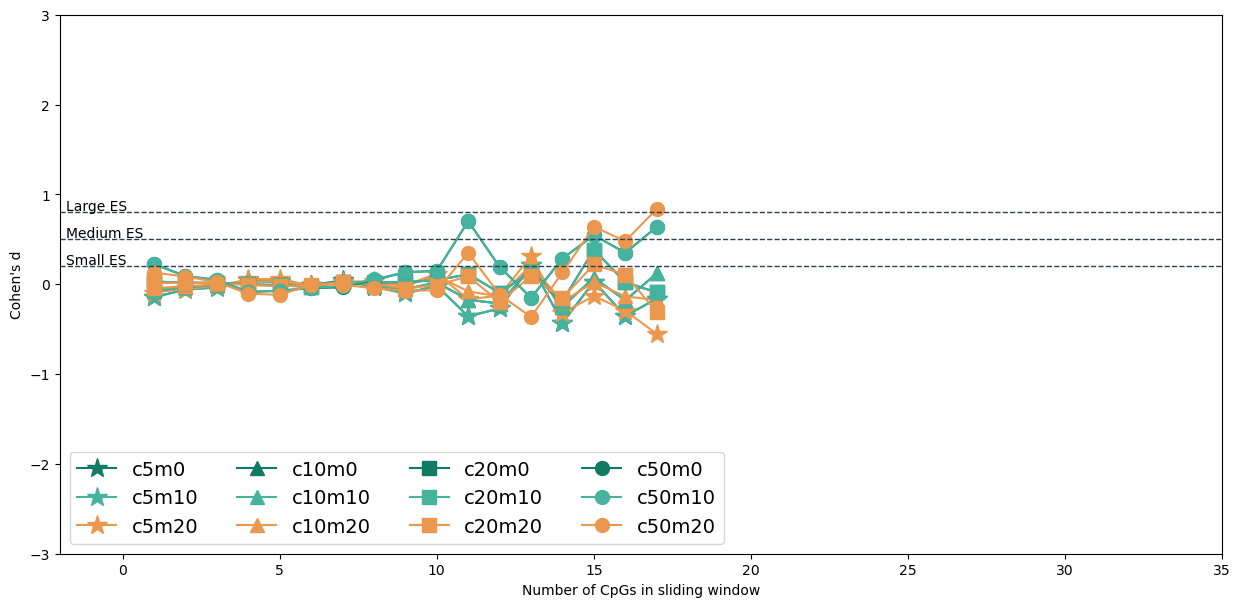

In [101]:
plot_nbr_CpGs_cohensd(df_pvalues, params)

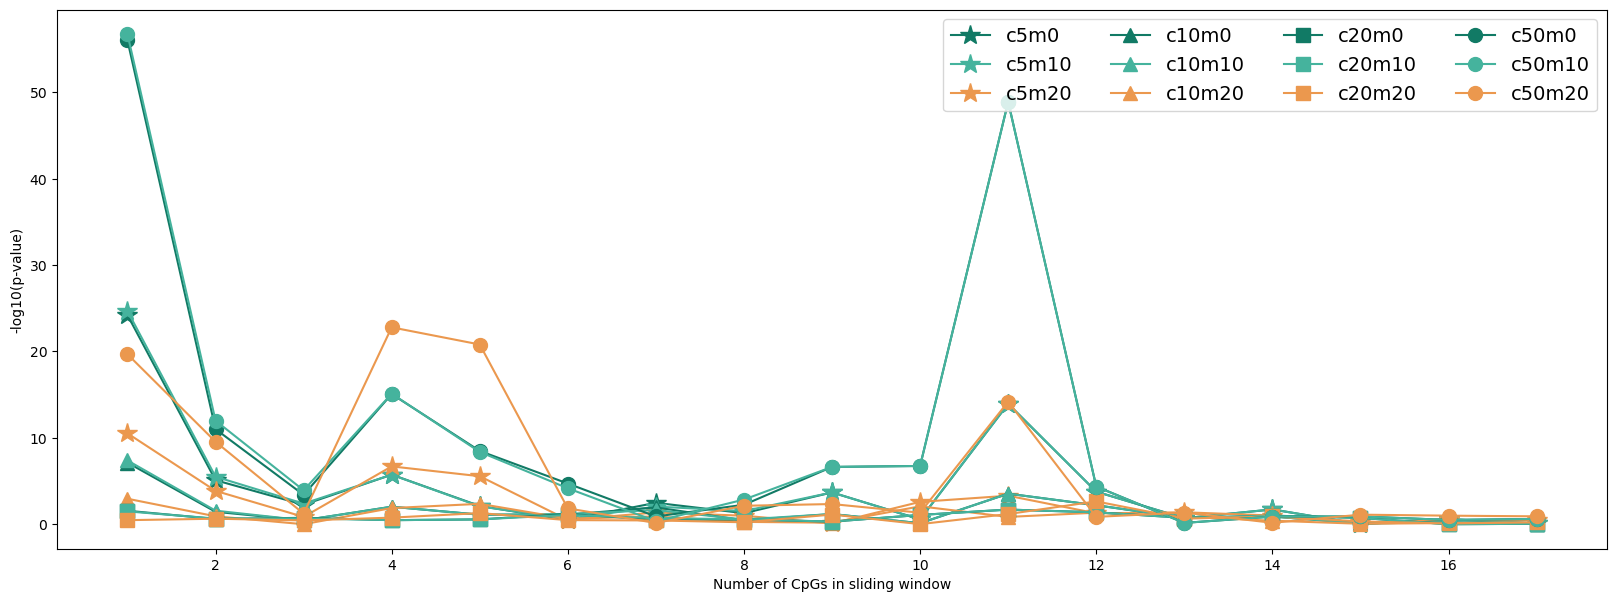

In [102]:
plot_pvals_cohensd(df_pvalues, params)

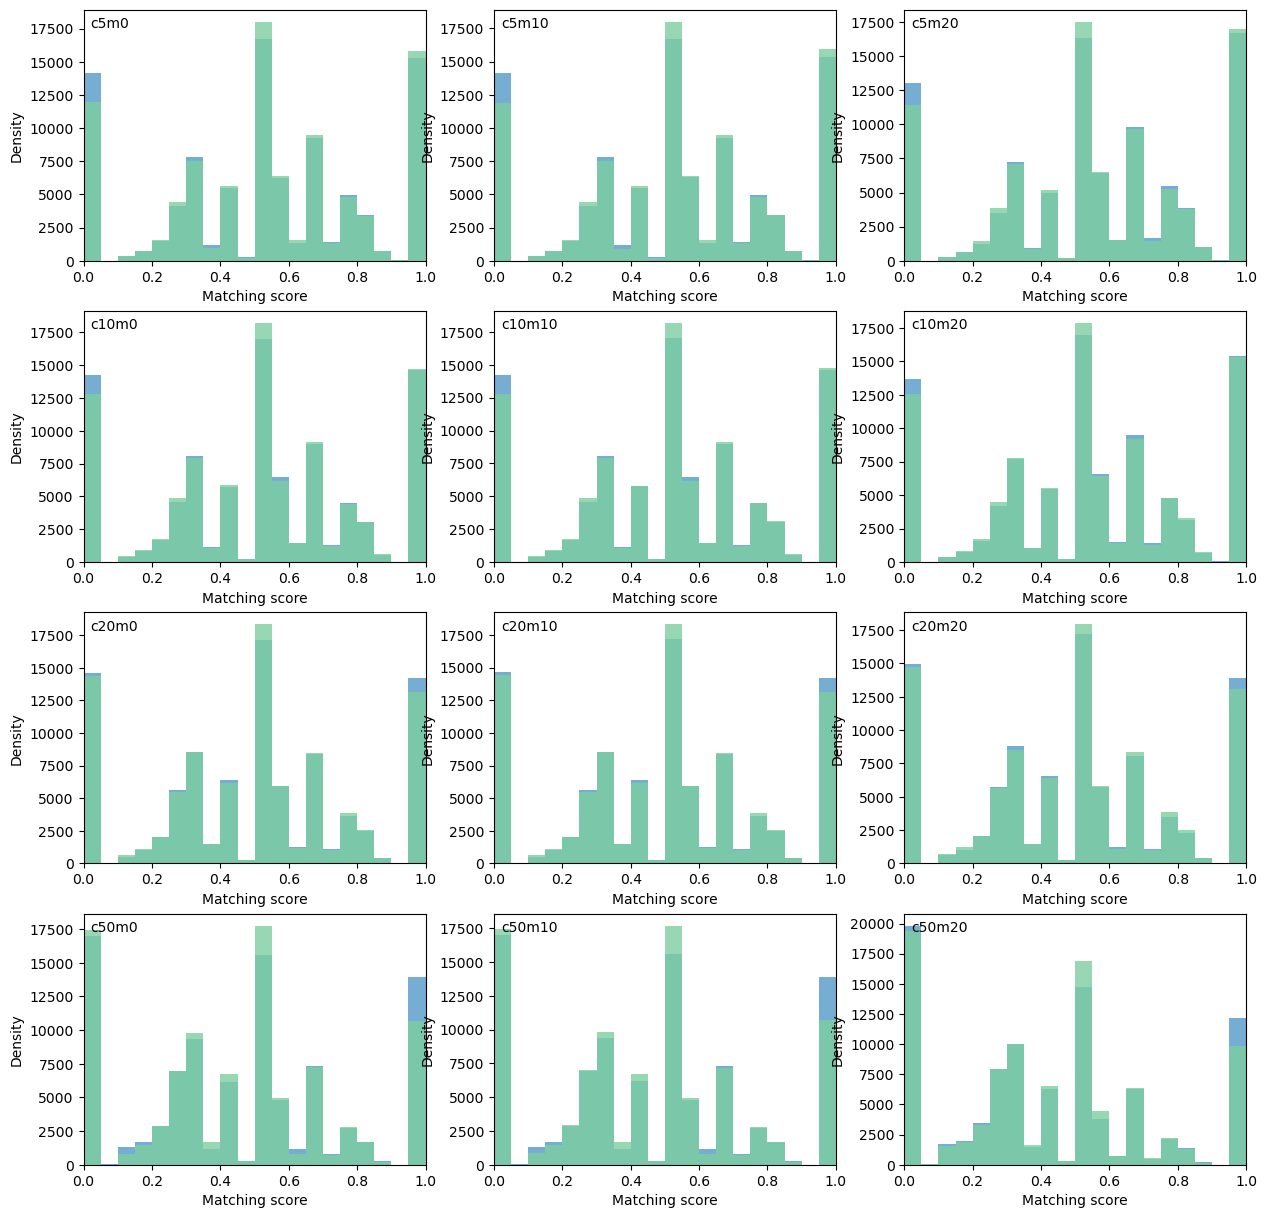

In [103]:
plot_score_distribution(df_score_exp,df_score_random,params)

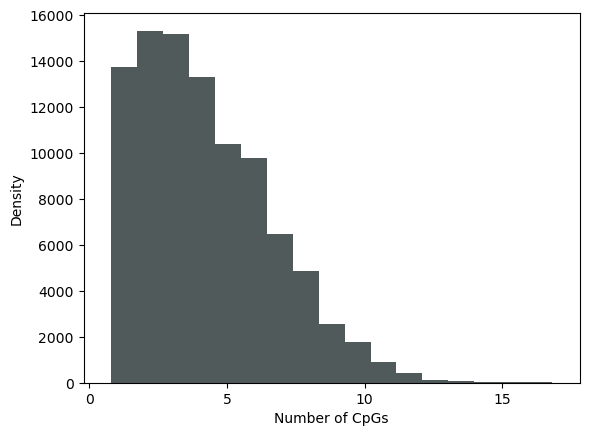

In [104]:
plot_hist_distr_CpGs(df_score_exp)

##### Sliding Windows for NORs

In [106]:
infile = data_path + 'promoter.NOR.HCG.intersect.bed'
df = nome.get_nuc_pos_methylation(infile)

infile = data_path + 'promoter.NOR.HCG.random.intersect.bed'
df_random = nome.get_nuc_pos_methylation(infile)

In [107]:
df.head()

,trans_id,refid,gene_name,chrom,promoter_start,promoter_end,TSS,TES,strand,nuc_region_start_genome,nuc_region_end_genome,nuc_region_length,meth_start_genome,meth_end_genome,meth_rate
0,NM_198317-893963,NM_198317,KLHL17,chr1,893963,896963,895963,901099,+,894016,896616,2600,894256,894257,0.0
1,NM_198317-893963,NM_198317,KLHL17,chr1,893963,896963,895963,901099,+,894016,896616,2600,894291,894292,0.0
2,NM_198317-893963,NM_198317,KLHL17,chr1,893963,896963,895963,901099,+,894016,896616,2600,894471,894472,0.0
3,NM_198317-893963,NM_198317,KLHL17,chr1,893963,896963,895963,901099,+,894016,896616,2600,894490,894491,0.0
4,NM_198317-893963,NM_198317,KLHL17,chr1,893963,896963,895963,901099,+,894016,896616,2600,894494,894495,0.0


In [108]:
df_random.head()

,trans_id,refid,gene_name,chrom,promoter_start,promoter_end,TSS,TES,strand,nuc_region_start_genome,nuc_region_end_genome,nuc_region_length,meth_start_genome,meth_end_genome,meth_rate
0,NM_198317-893963,NM_198317,KLHL17,chr1,893963,896963,895963,901099,+,894016,896616,2600,894256,894257,0.00
1,NM_198317-893963,NM_198317,KLHL17,chr1,893963,896963,895963,901099,+,894016,896616,2600,894291,894292,33.33
2,NM_198317-893963,NM_198317,KLHL17,chr1,893963,896963,895963,901099,+,894016,896616,2600,894471,894472,0.00
3,NM_198317-893963,NM_198317,KLHL17,chr1,893963,896963,895963,901099,+,894016,896616,2600,894490,894491,100.00
4,NM_198317-893963,NM_198317,KLHL17,chr1,893963,896963,895963,901099,+,894016,896616,2600,894494,894495,33.33


In [109]:
df_sliding_windows = make_sliding_windows_file(df, x_y_clash_dict_norm)
df_sliding_windows_random = make_sliding_windows_file(df_random, x_y_clash_dict_norm)

In [110]:
df_sliding_windows.head()

,trans_id,refid,NOR_nbr,window_nbr,nbr_meth_CpGs,nuc_region_length,meth_rates_window
0,NM_001353972-74054037,NM_001353972,1,507,1,1501,{136: 100.0}
1,NM_001353972-74054037,NM_001353972,1,508,1,1501,{135: 100.0}
2,NM_001353972-74054037,NM_001353972,1,509,1,1501,{134: 100.0}
3,NM_001353972-74054037,NM_001353972,1,510,1,1501,{133: 100.0}
4,NM_001353972-74054037,NM_001353972,1,511,1,1501,{132: 100.0}


In [111]:
df_sliding_windows_random.head()

,trans_id,refid,NOR_nbr,window_nbr,nbr_meth_CpGs,nuc_region_length,meth_rates_window
0,NM_001353972-74054037,NM_001353972,1,507,1,1501,{136: 0.0}
1,NM_001353972-74054037,NM_001353972,1,508,1,1501,{135: 0.0}
2,NM_001353972-74054037,NM_001353972,1,509,1,1501,{134: 0.0}
3,NM_001353972-74054037,NM_001353972,1,510,1,1501,{133: 0.0}
4,NM_001353972-74054037,NM_001353972,1,511,1,1501,{132: 0.0}


In [112]:
df_score_exp = calc_score_lists(df_sliding_windows, x_y_clash_dict_norm, params)
df_score_random = calc_score_lists(df_sliding_windows_random, x_y_clash_dict_norm, params)

In [113]:
df_score_exp.head()

,refid_NOR,trans_id,refid,NOR_nbr,window_nbr,nbr_CpGs,nuc_region_length,c5m0,c5m10,c5m20,c10m0,c10m10,c10m20,c20m0,c20m10,c20m20,c50m0,c50m10,c50m20
0,NM_001353972-1,NM_001353972-74054037,NM_001353972,1,507,1,1501,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
1,NM_001353972-1,NM_001353972-74054037,NM_001353972,1,508,1,1501,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
2,NM_001353972-1,NM_001353972-74054037,NM_001353972,1,509,1,1501,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
3,NM_001353972-1,NM_001353972-74054037,NM_001353972,1,510,1,1501,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,NM_001353972-1,NM_001353972-74054037,NM_001353972,1,511,1,1501,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0


In [114]:
df_score_random.head()

,refid_NOR,trans_id,refid,NOR_nbr,window_nbr,nbr_CpGs,nuc_region_length,c5m0,c5m10,c5m20,c10m0,c10m10,c10m20,c20m0,c20m10,c20m20,c50m0,c50m10,c50m20
0,NM_001353972-1,NM_001353972-74054037,NM_001353972,1,507,1,1501,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
1,NM_001353972-1,NM_001353972-74054037,NM_001353972,1,508,1,1501,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
2,NM_001353972-1,NM_001353972-74054037,NM_001353972,1,509,1,1501,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
3,NM_001353972-1,NM_001353972-74054037,NM_001353972,1,510,1,1501,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,NM_001353972-1,NM_001353972-74054037,NM_001353972,1,511,1,1501,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0


In [115]:
df_pvalues = make_df_p_vals_cohens_d(df_score_exp, df_score_random, params)

/home/kevin/miniconda3/envs/helms-lab/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [116]:
df_pvalues.head()

,nbr_CpGs,parameter,N_EXP,N_RAND,mean_EXP,median_EXP,std_EXP,mean_RAND,median_RAND,std_RAND,cohens_d,is_normal_EXP,is_normal_RAND,pval_ttest,t_stat,pval_ranksums,pval_ks_2samp
0,1,c5m0,41008,41008,0.590153,1.0,0.491805,0.544235,1.0,0.498039,0.092776,0.0,0.0,1.563950e-40,13.284649,4.782133e-30,5.247649e-38
1,1,c5m10,41008,41008,0.592323,1.0,0.491402,0.544235,1.0,0.498039,0.097200,0.0,0.0,2.756969e-44,13.918174,8.604534e-33,1.208529e-41
2,1,c5m20,41008,41008,0.602370,1.0,0.489408,0.558159,1.0,0.496606,0.089674,0.0,0.0,5.294001e-38,12.840399,5.633426e-28,2.903205e-35
3,1,c10m0,41008,41008,0.549527,1.0,0.497541,0.524629,1.0,0.499393,0.049948,0.0,0.0,4.308350e-13,7.152106,6.617855e-10,1.788405e-11
4,1,c10m10,41008,41008,0.550624,1.0,0.497431,0.524629,1.0,0.499393,0.052155,0.0,0.0,4.106388e-14,7.468157,1.139940e-10,1.808286e-12


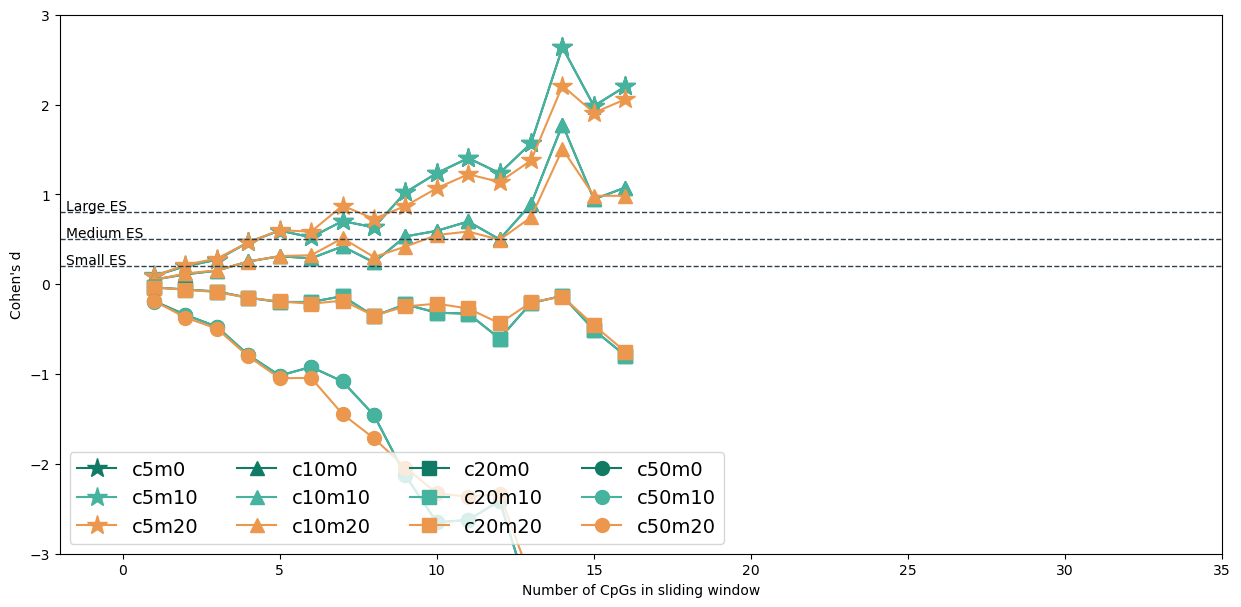

In [117]:
plot_nbr_CpGs_cohensd(df_pvalues, params)

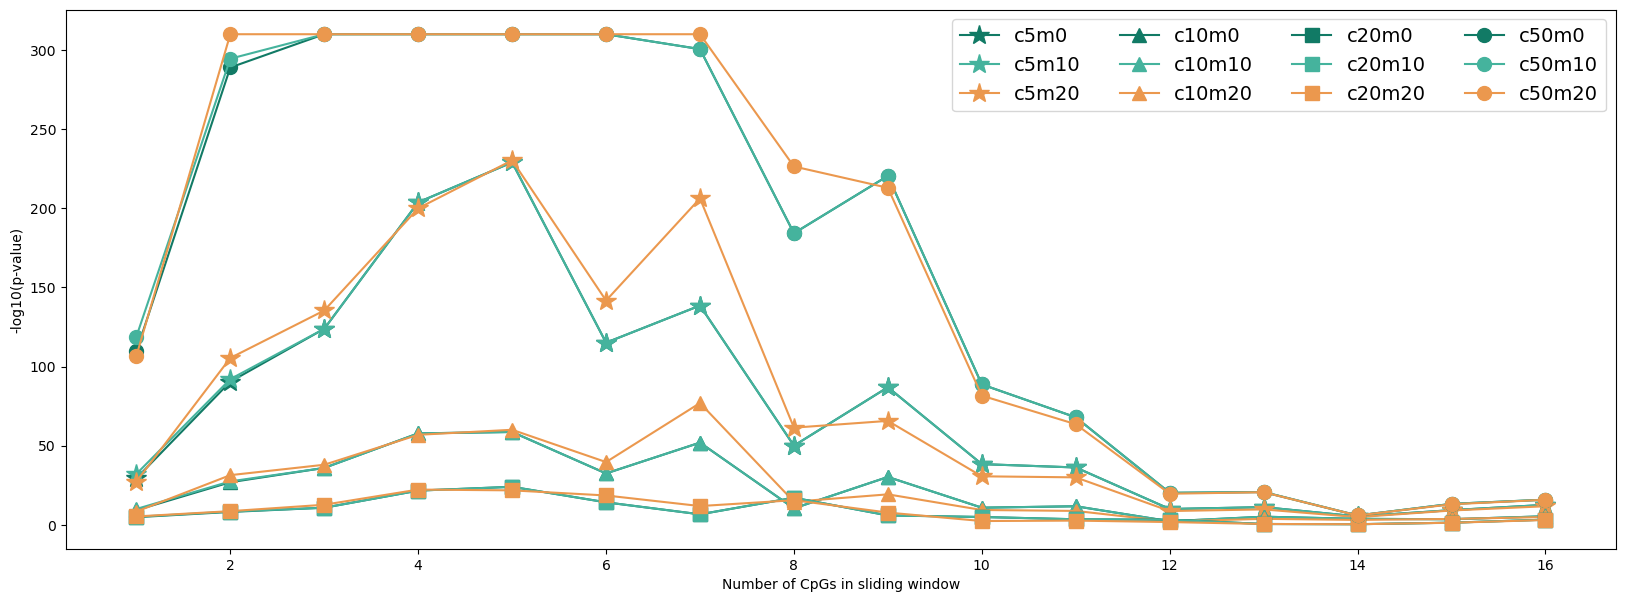

In [118]:
plot_pvals_cohensd(df_pvalues, params)

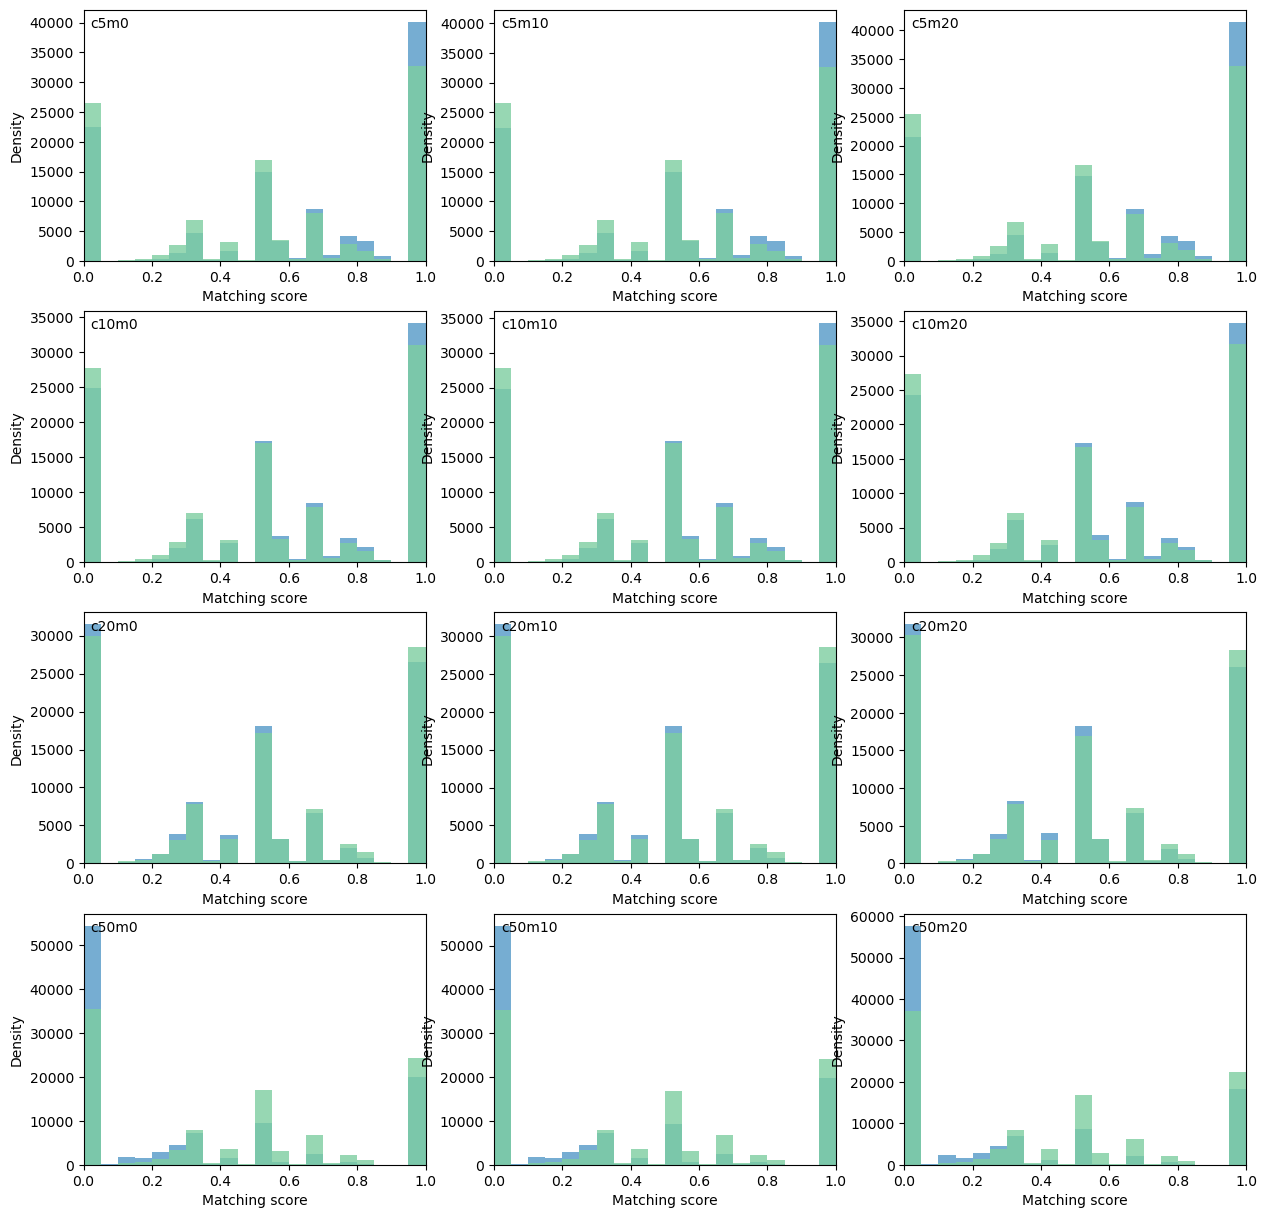

In [119]:
plot_score_distribution(df_score_exp,df_score_random,params)

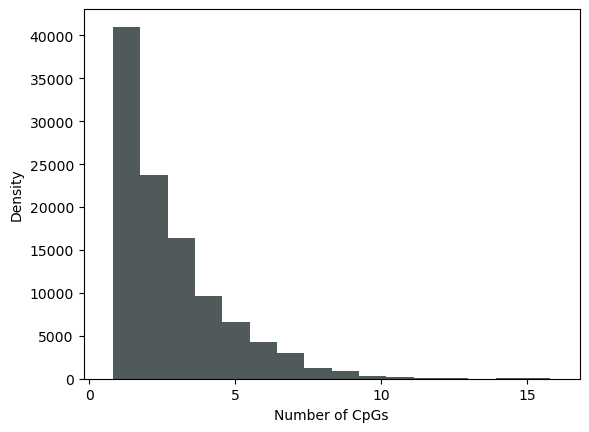

In [122]:
plot_hist_distr_CpGs(df_score_exp)